# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')


In [5]:
# Extract all rows of data
# <tr class="data-row">
#               <td>2</td>
#               <td>2012-08-16</td>
#               <td>10</td>
#               <td>155</td>
#               <td>6</td>
#               <td>-75.0</td>
#               <td>739.0</td>
#             </tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:


# looking for <tr class="data-row">
trs = soup.find_all('tr', class_='data-row')

# A blank list to hold the headlines
mars_weather = []

# Loop over all the tr elements sin trs
for tr in trs:
      
      tds=tr

      # A blank list to store the td from each row
      td_lst=[]

      # Loop over all the td in the tds
      for td in tds:
            
            # Append everything that isn't a new line '\n'
            if td.text != '\n':
                  td_lst.append(td.text)
            
            # append the list of tds to the list of mars_weather
            mars_weather.append(td_lst)

In [7]:
# Create pandas data frame from a list of lists
df_raw = pd.DataFrame(mars_weather, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure' ])

In [8]:
# Export raw data fram as CSV file
file_one = os.path.join('.','Output', 'Mars_temp_data_raw.csv')        # Set the file name an path
df_raw.to_csv(file_one, index=True, header=True)  

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# df = pd.DataFrame(mars_weather, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure' ])
df = df_raw.copy(deep=True)

# Remove duplicates, If we don't remove the duplicates all of the mean calculation will be skewed (min and Max values will still be ok)
df.drop_duplicates(inplace = True)

In [10]:
# Create a function to check the status of a data frame.  The argument is the name of a dataframe.
def df_status(df_to_check):
      print(f'------------ Data type: ------------ \n {df_to_check.dtypes}' )
      print(f'\n \n ------------ Shape:  ------------ \n {df_to_check.shape}' )
      print(f'\n \n ------------Columns: ------------ \n {df_to_check.columns} \n')
      print (df_to_check.head(2))

In [11]:
# Confirm DataFrame was created successfully
df_status(df)

------------ Data type: ------------ 
 id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

 
 ------------ Shape:  ------------ 
 (1867, 7)

 
 ------------Columns: ------------ 
 Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object') 

    id terrestrial_date sol   ls month min_temp pressure
0    2       2012-08-16  10  155     6    -75.0    739.0
15  13       2012-08-17  11  156     6    -76.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Change data types for data analysis 
df = df.astype({'id':'int', 'terrestrial_date':'datetime64[ns]', 'sol':'int','ls':'int','month':'int', 'min_temp':'float', 'pressure':'float'})
dfi = df.sort_values(by='terrestrial_date',ascending=True, ignore_index=True)

In [13]:
# Confirm type changes were successful by examining data types again
df_status(dfi)

------------ Data type: ------------ 
 id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

 
 ------------ Shape:  ------------ 
 (1867, 7)

 
 ------------Columns: ------------ 
 Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object') 

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0


In [14]:
# Export as clean data CSV file
file_one = os.path.join('.','Output', 'Mars_temp_data_clean.csv')        # Set the file name an path
dfi.to_csv(file_one, index=True, header=True)  

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
# The question that matches the answer provided is "how many unique observations were made in each earth month?"
dfm = dfi[['month','sol']]
dfm = dfm.groupby(['month']).count()
dfm.head(12)

,sol
month,
1,174
2,178
3,192
4,194
5,149
6,147
7,142
8,141
9,134


In [16]:
# 2. How many Martian days' worth of data are there?

# number of sol day covered by the data
# this is the difference between the oldest sol date and the newest sol date without reguard to dates without observations
sol_days = dfi['sol'].max()-df['sol'].min()

# number of earth day covered by the data
# this is the difference between the oldest earth date and the newest earth date without reguard to dates without observations
earth_days = dfi['terrestrial_date'].max()-df['terrestrial_date'].min()

# The number of unique sol dates with observations
observations = dfi['sol'].nunique()

print(f'Number of unique sol date observations recorder = {observations}  \nMars days = {sol_days}  \nEarth days = {earth_days}  ')

Number of unique sol date observations recorder = 1867  
Mars days = 1967  
Earth days = 2021 days 00:00:00  


In [17]:
# # 3. What is the average low temperature by month?
dft = dfi[['month','min_temp']]
dft = dft.groupby(['month']).mean()
dft.head(12)

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


C:\Users\jspinega\AppData\Local\Temp\ipykernel_8880\2719358591.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dft = dfi.groupby(['month']).mean()


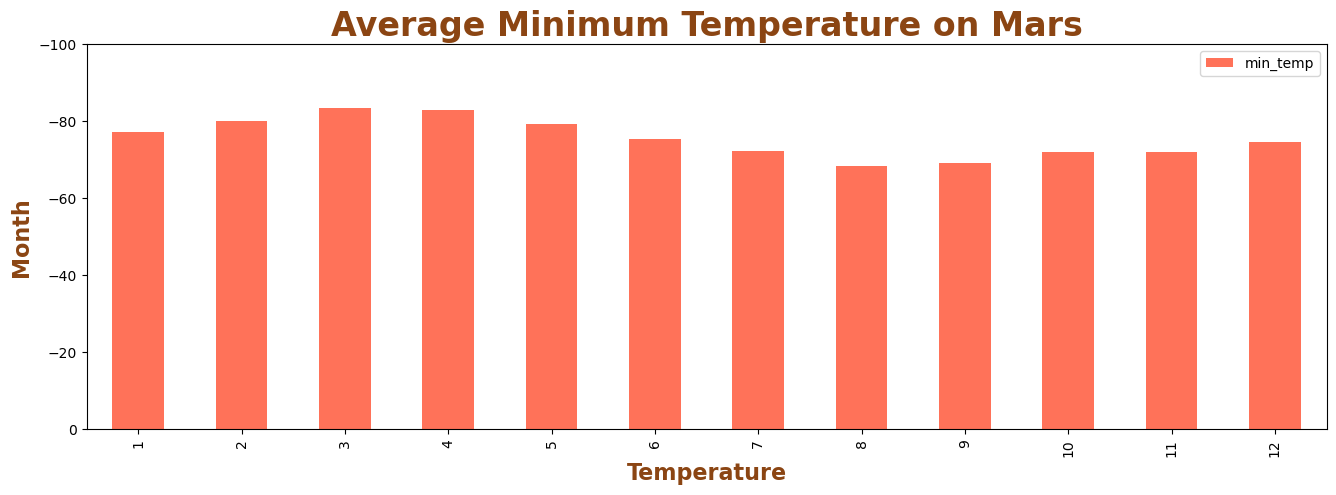

In [18]:
# Plot the average temperature by month
# get the average for each month using groupby
dft = dfi.groupby(['month']).mean()

# plot the average min tep by month
dft.plot(kind='bar'
            , y='min_temp'
            , color='tomato'
            , figsize=(16,5)
            , alpha=0.9
            , align="center");

# Add a title
plt.title('Average Minimum Temperature on Mars',                                    
            fontsize = 24,
            color="saddlebrown", 
            fontweight="bold")         

# Add a x-axis descrition
plt.xlabel('Temperature',                                                         
            fontsize = 16,
            color='saddlebrown', 
            fontweight="bold")

# Add a y-axis description
plt.ylabel('Month',                                               
            fontsize = 16, 
            color='saddlebrown', 
            fontweight="bold")      

# flip over the y axis.  It will go up from 0 to -100
plt.ylim(0, -100)

# Prepare to save the figure
save_fig = os.path.join('.','Output', 'Q3a_Averge_Min_Temp_by_Month.jpg')                
plt.savefig(save_fig, bbox_inches='tight')          

In [19]:
# Identify the warmest minimum temp in Curiosity's location

# The warmest minimum temperature is
df_hot = dfi['min_temp'].max()

# locate the record with the warmest temperature was recorded
df_h = df.loc[df['min_temp']==df_hot]

Hotest_day = df_h.iloc[0][2]
Hotest_temp = df_h.iloc[0][5]

print(f'The hotest observed day was on sol {Hotest_day} when it was {Hotest_temp}')

The hotest observed day was on sol 1692 when it was -62.0


In [20]:
# Identify the coldest day in Curiosity's location
#df = df.loc[df['col_A'] != 'Material']

#a = oo_df['Medal']=='Gold'

# The hostest temperature is
df_cold = dfi['min_temp'].min()

# locate the record with the hotest temperature
df_c = df.loc[df['min_temp']==df_cold]

Coldest_day = df_c.iloc[0][2]
Coldest_temp = df_c.iloc[0][5]

print(f'The hotest observed day was on sol {Coldest_day} when it was {Coldest_temp}')

The hotest observed day was on sol 1188 when it was -90.0


C:\Users\jspinega\AppData\Local\Temp\ipykernel_8880\1284957963.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dft = dfi.groupby(['month']).mean().sort_values('min_temp')


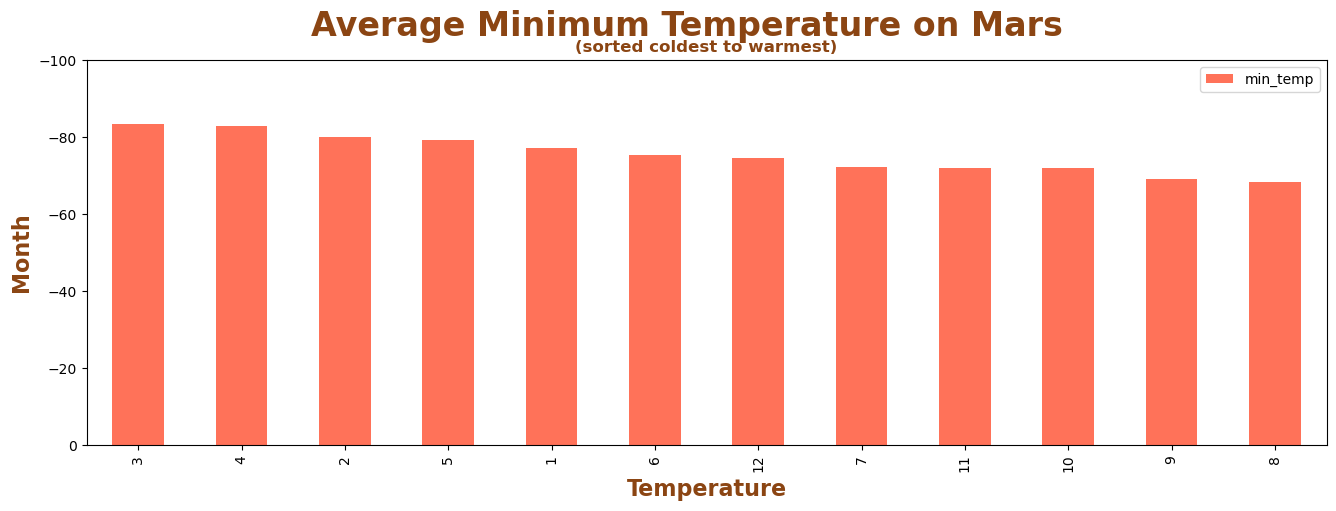

In [27]:
# Plot the average temperature by month
# get the average for each month using groupb
dft = dfi.groupby(['month']).mean().sort_values('min_temp')

# plot the average min tep by month
dft.plot(kind='bar'
            , y='min_temp'
            , color='tomato'
            , figsize=(16,5)
            , alpha=0.9
            , align="center");

# Add a super title because there is a subtitle
plt.suptitle('Average Minimum Temperature on Mars', 
            fontsize = 24,
            color="saddlebrown", 
            fontweight="bold")   

# Add a title - This becomes a sub title because there is a super title
plt.title('(sorted coldest to warmest)',  
            fontsize = 12,
            color="saddlebrown", 
            fontweight="bold") 

# Add a x-axis descrition
plt.xlabel('Temperature',
            fontsize = 16,
            color='saddlebrown', 
            fontweight="bold")

# Add a y-axis description
plt.ylabel('Month',
            fontsize = 16, 
            color='saddlebrown', 
            fontweight="bold")


plt.ylim(0, -100)

# Prepare to save the figure 
save_fig = os.path.join('.','Output', 'Q3b_Averge_Min_Temp_by_Month_sort.jpg')               
plt.savefig(save_fig, bbox_inches='tight')          

C:\Users\jspinega\AppData\Local\Temp\ipykernel_8880\359301331.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfp = dfi.groupby(['month']).mean()


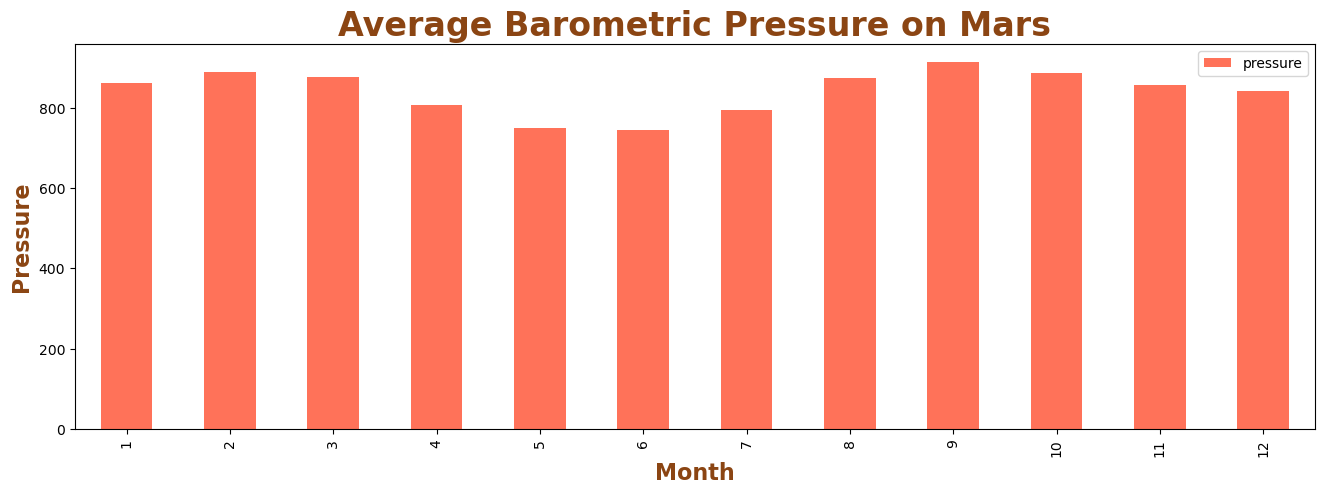

In [22]:
# 4. Average pressure by Martian month
# Plot the average temperature by month
dfp = dfi.groupby(['month']).mean()

# plot the average min tep by month
dfp.plot(kind='bar'
            , y='pressure'
            , color='tomato'
            , figsize=(16,5)
            , alpha=0.9
            , align="center");

 # Add a title
plt.title('Average Barometric Pressure on Mars', 
            fontsize = 24,
            color="saddlebrown", 
            fontweight="bold")         

# Add a x-axis descrition
plt.xlabel('Month',
            fontsize = 16,
            color='saddlebrown', 
            fontweight="bold")

# Add a y-axis description
plt.ylabel('Pressure',
            fontsize = 16, 
            color='saddlebrown', 
            fontweight="bold")      

 # Prepare to save the figure  
save_fig = os.path.join('.','Output', 'Q4_Averge_Pressure_by_Month.jpg')             
plt.savefig(save_fig, bbox_inches='tight')  


In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# To determine this we are going to plot the temp vs the number of days since we started. 
# From this we will look for seasonality.  The difference in days between peaks of troufts will twll ups the lenght of a martian year.

earth_day = dfi
# the date of the first entery in our data is at earth_date.iloc[0][1] = start date
start_date = earth_day.iloc[0][1]

# day number = earth date - start date
earth_day['earth_day_num'] = earth_day['terrestrial_date'] - start_date
earth_day['earth_day_num'] = earth_day['earth_day_num'].dt.days

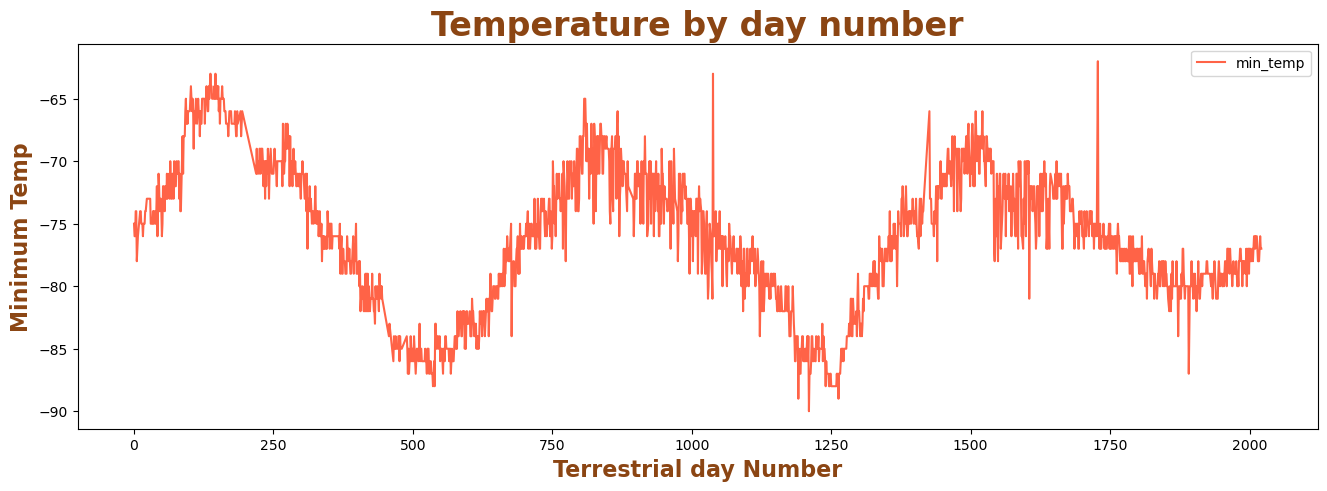

In [24]:
# plot data frame earth_day temp vs earth_day_num

earth_day.plot(kind='line'
            , x='earth_day_num'
            , y='min_temp'
            , color='tomato'
            , figsize=(16,5));

#add a chart title
plt.title('Temperature by Day Number',
            fontsize = 24,
            color="saddlebrown", 
            fontweight="bold")         

# label the x axis
plt.xlabel('Terrestrial day Number',
            fontsize = 16,
            color='saddlebrown', 
            fontweight="bold")
# lbael the y axis
plt.ylabel('Minimum Temp',
            fontsize = 16, 
            color='saddlebrown', 
            fontweight="bold")      

# save the file to the output sub directory
save_fig = os.path.join('.','Output', 'Q5_Length_of_Martion_year.jpg')
plt.savefig(save_fig, bbox_inches='tight')  

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
# Export the final version of the data frame that includes the day number.
file_one = os.path.join('.','Output', 'Mars_temp_data_clean_with_day_no.csv')        # Set the file name an path
dfi.to_csv(file_one, index=True, header=True)  

In [26]:
browser.quit()